# This notebook demonstrates handwritten digits recognition using SVM

First, we import libraries we will use in the example:
 1. Numpy and pandas, for data munipulation.
 2. Matplotlib for plotting.
 3. PCA (principle component analysis) from sklearn to perform dimensionality reduction
 4. train_test_split from sklearn to divid whole dataset into test and train datasets.
 5. SVM (support vector machine) from sklearn
 
 Note: %matplotlib inline enables pltos shown in this notebook.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import pandas as pd 
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

Next step is to read data, separate target variable and other variables, and split whole dataset into train and test datasets.

Note: random_state=0 makes sure every time you run it, you get the same datasets, although records of datasets are randomly selected, this is useful when you compare models and you know the differences are not from data.

In [3]:
# Read in the data, make sure the filename and path is correct on your computer.
labeled_images = pd.read_csv('digits_train.csv')

#select only first 1000 records, and images are from the second column to the last column.
images = labeled_images.iloc[0:1000,1:]

#select only first 1000 records (rows), the first column is the label, or the digit.
labels = labeled_images.iloc[0:1000,:1]

#Split the data into train_X, test_X, train_y and test_y
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
print('Shape of train_images: {0:} rows and {1:} columns'.format(*train_images.shape))
print('Shape of train_labels: {0:} rows and {1:} columns'.format(*train_labels.shape))
print('Shape of test_images: {0:} rows and {1:} columns'.format(*test_images.shape))
print('Shape of test_labels: {0:} rows and {1:} columns'.format(*test_labels.shape))

Shape of train_images: 800 rows and 784 columns
Shape of train_labels: 800 rows and 1 columns
Shape of test_images: 200 rows and 784 columns
Shape of test_labels: 200 rows and 1 columns


Let's see what first 5 rows of original data look like.

In [6]:
labeled_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We then take a peek at the first 25 images below.

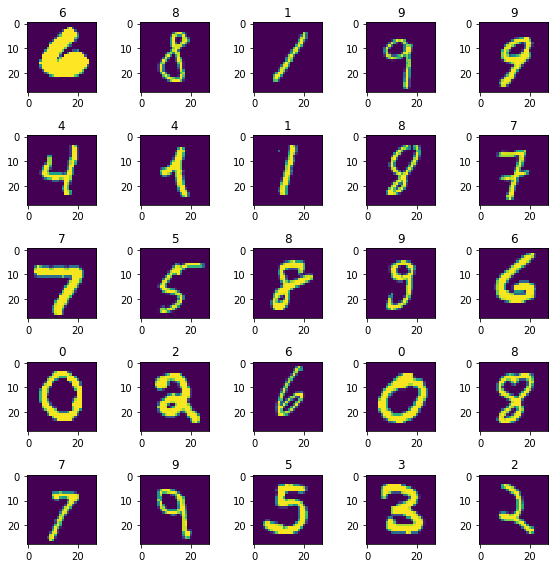

In [4]:
import math
f,ax=plt.subplots(5,5,figsize=(8,8)) #set up a 5 by 5 plotting area
for i in range (1,26):
    img=train_images.iloc[i].as_matrix()
    img=img.reshape((28,28)) #reshape into 28 by 28 pixels
    n=math.ceil(i/5)-1 #math.ceil to round up
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(img)
    ax[m[i-1], n].set_title(train_labels.iloc[i,0])
f.tight_layout()

Let's see the a paritcular image in a larger format.

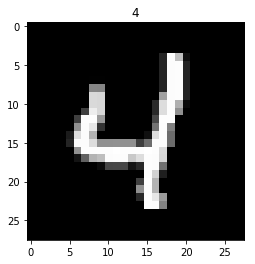

In [5]:
i=2
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

We did a little bit data exploration, and now we read in data in another way and try different sizes of the train dataset.

In [7]:
COMPONENT_NUM = 35 # This is a number I tried, you can try other numbers.

print('Read training data...')
with open('..\\data\\digits_train.csv', 'r') as reader:
    reader.readline()
    train_label = []
    train_data = []
    ln=0
    for line in reader.readlines():
        data = list(map(int, line.rstrip().split(',')))
        train_label.append(data[0])
        train_data.append(data[1:])
        ln+=1
        if ln>=10000:break
print('Loaded ' + str(len(train_label))+' rows of data')

Read training data...
Loaded 10000 rows of data


We convert the data into numpy arrays which will be used by PCA and SVM later.

.fit() is to estimate parameters of a model, and .transform() is to transform the original data into new featurs based on .fit()

In [8]:
print('Dimensionality Reduction...\n')
train_label = np.array(train_label)
train_data = np.array(train_data)
print('Original train data shape is {0:} rows and {1:} columns'.format(*train_data.shape))
pca = PCA(n_components=COMPONENT_NUM, whiten=True)
pca.fit(train_data)
train_data = pca.transform(train_data)
print('Transformed train data shape is {0:} rows and {1:} columns'.format(*train_data.shape))

Dimensionality Reduction...

Original train data shape is 10000 rows and 784 columns
Transformed train data shape is 10000 rows and 35 columns


Let's now fit the SVM model using default settings.

In [9]:
print('Train SVM...')
svc = SVC()
svc.fit(train_data, train_label)

Train SVM...


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's see the accuracy on the training dataset.

In [10]:
svc.score(train_data, train_label)

0.99080000000000001

Now read in test data, which is the rest of data.

In [11]:
print('Read testing data...')
with open('..\\data\\digits_train.csv', 'r') as reader:
    reader.readline()
    test_label = []
    test_data = []
    tn=0
    for line in reader.readlines():
        if tn>=10000:
            data = list(map(int, line.rstrip().split(',')))
            test_label.append(data[0])
            test_data.append(data[1:])
        tn+=1     
print('Loaded ' + str(len(test_data))+' rows')

Read testing data...
Loaded 32000 rows


Next predict the test data using trained SVM, but before prediction, we need also transform the data the same way as in train dataset.

In [12]:
print('Predicting...')
test_data = np.array(test_data)
test_data = pca.transform(test_data)
predict = svc.predict(test_data)

Predicting...


Let's find out the accuracy of the model on the test dataset.

In [13]:
svc.score(test_data, test_label)

0.96637499999999998

Let's try to increase training size to 20,000 and later to 30,000 and then see the differences.

| Training data size   |  Training data accuracy |  Test data accuracy |
|:--------------------:| ----------------------- |-------------------- |
|      10,000          |      0.99080000000000001|  0.96637499999999998|
|      20,000          |                         |                     |
|      30,000          |                         |                     |